In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [42]:
df = pd.read_csv('../data/training_v2.csv')
print(df.shape)
df.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

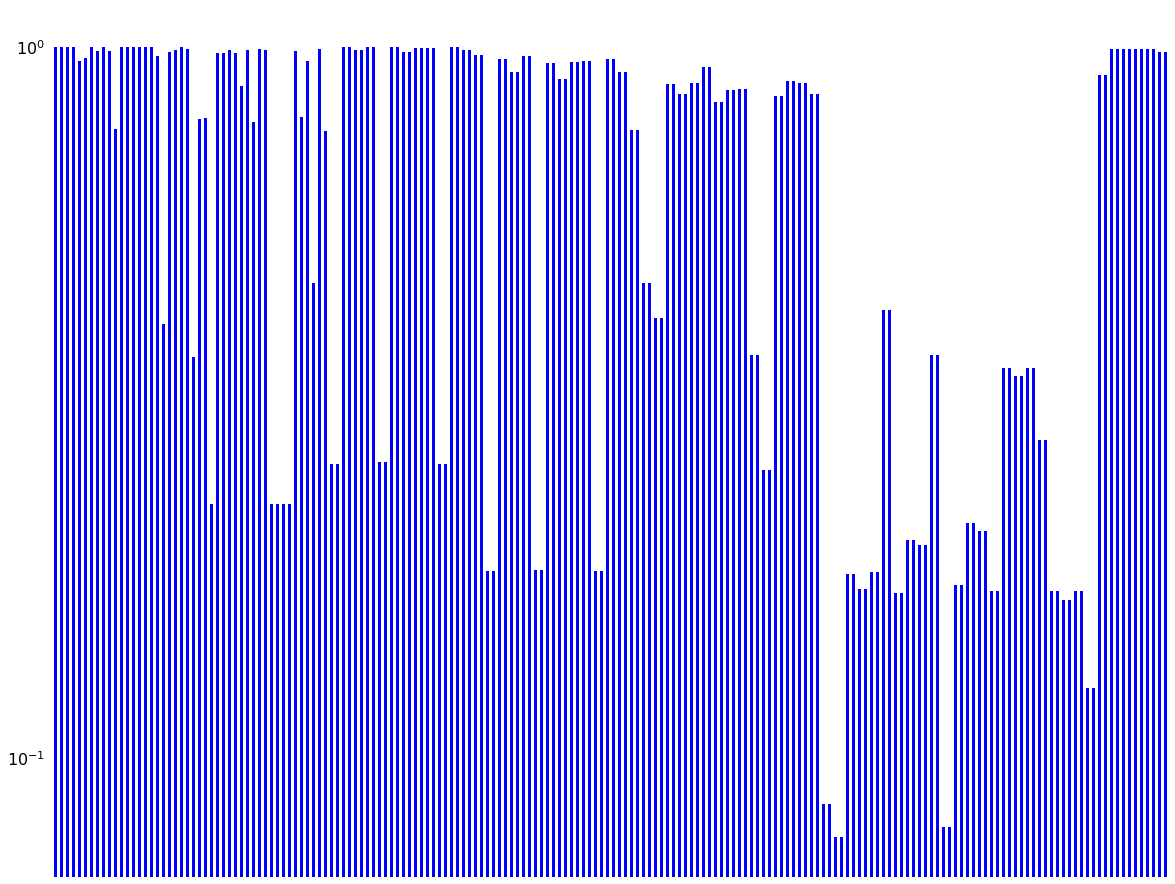

In [8]:
msno.bar(df, color="blue", log=True, figsize=(20,16))

In [9]:
null_values(df)

Dataframe has 186 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [10]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                              float64
bmi                              float64
elective_surgery                 int64
ethnicity                        object
gender                           object
height                           float64
hospital_admit_source            object
icu_admit_source                 object
icu_id                           int64
icu_stay_type                    object
icu_type                         object
pre_icu_los_days                 float64
readmission_status               int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            int64
arf_apache

In [11]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

In [12]:
df.describe(include =["O"])

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,70304,91601,91713,91713,90051,90051
unique,6,2,15,5,3,8,11,10
top,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,36962,54060,86183,50586,29999,38816


In [44]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

In [ ]:
plt.subplots(figsize=(50, 50))
sns.heatmap(corr_matrix, mask = mask, square = True, cmap = 'coolwarm', annot = True)

In [10]:
df.corr()['hospital_death']

encounter_id                    -0.005243
patient_id                       0.004877
hospital_id                     -0.001255
hospital_death                   1.000000
age                              0.111017
bmi                             -0.031247
elective_surgery                -0.093574
height                          -0.019526
icu_id                           0.000994
pre_icu_los_days                 0.063316
readmission_status                    NaN
weight                          -0.038362
albumin_apache                  -0.193809
apache_2_diagnosis              -0.089862
apache_3j_diagnosis             -0.090715
apache_post_operative           -0.083674
arf_apache                       0.027309
bilirubin_apache                 0.137464
bun_apache                       0.181435
creatinine_apache                0.114699
fio2_apache                      0.212249
gcs_eyes_apache                 -0.260373
gcs_motor_apache                -0.282449
gcs_unable_apache                0

### Observations:
- there are some obvious correlations between variables like weight, height, and bmi
- when i look at hospital death the apache variables that I see the negative corr are the gcs_Eyes, gcs_motor, and gcs_verable
    - interestingly enough these are used to assess the level of consciouness in a person after a brain injury, potential car crash or sports injury. So, low-levels of these mean that they are not testable. High-Levels mean that they are 
    - generally a brain injurty would score around an 8 or less on the summation of these 3 fields! 
- Also found out that some of these are used together and summed as a score! so, for example apache II is made up of 12 apache variables and is used to score from 0 - 71 pts

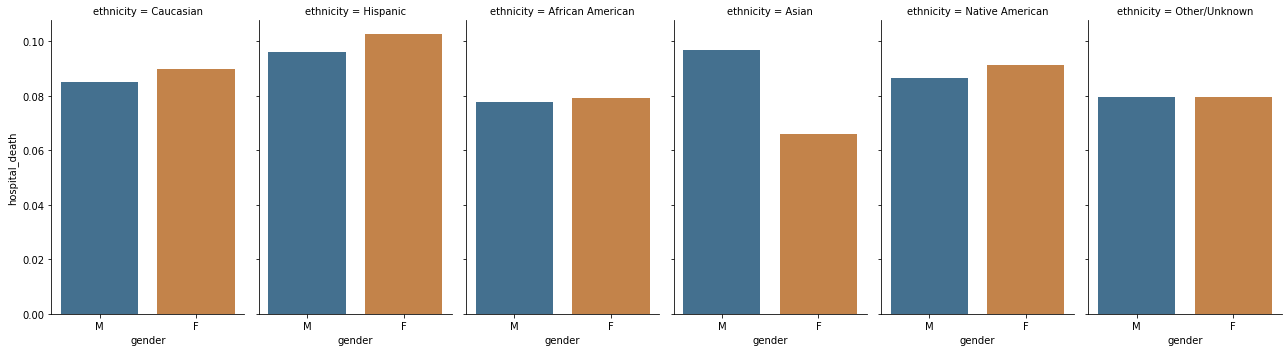

In [11]:
g = sns.catplot(x="gender", y="hospital_death", col="ethnicity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

In [12]:
df[df['ethnicity'] == 'Asian']['hospital_death'].value_counts()

0    1036
1      93
Name: hospital_death, dtype: int64

In [13]:
df[(df['ethnicity'] == 'Asian')]['gender'].value_counts()

M    598
F    531
Name: gender, dtype: int64

In [14]:
pd.crosstab(df[(df['ethnicity'] == 'Asian')]['gender'],
            df[df['ethnicity'] == 'Asian']['hospital_death'] )

hospital_death,0,1
gender,,
F,496,35
M,540,58


### for our exsiting dataset it looks like female have a higher rate of death in the ICU, but when we look at Asian in particular we see a stark comparison and that is that males have more hospital deaths

## Looking at apache covariates 


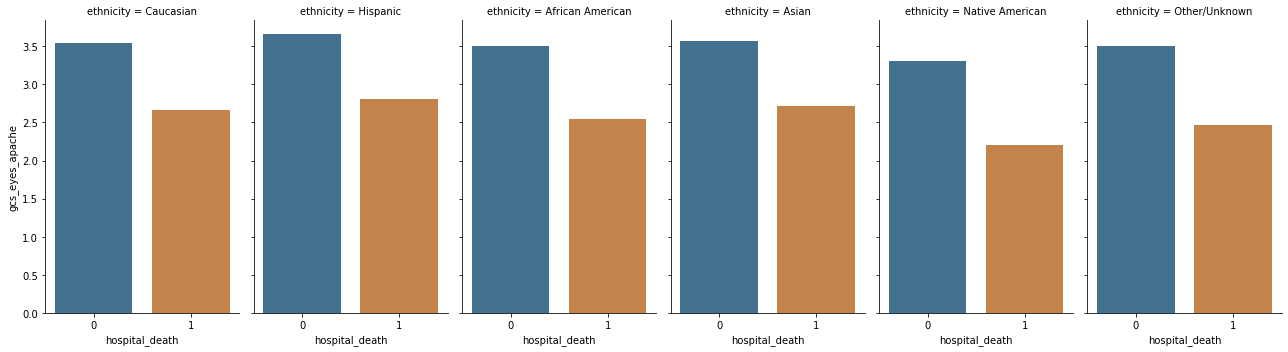

In [15]:
g = sns.catplot(x="hospital_death", y="gcs_eyes_apache", col="ethnicity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

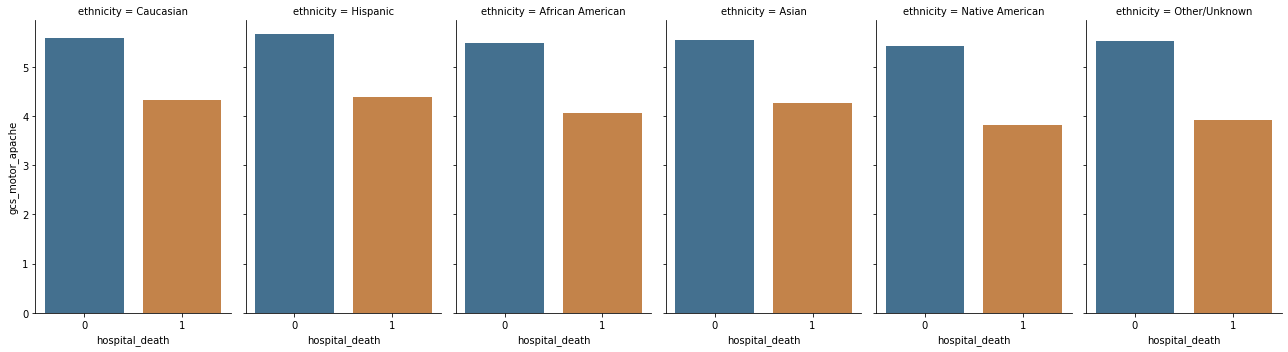

In [16]:
g = sns.catplot(x="hospital_death", y="gcs_motor_apache", col="ethnicity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

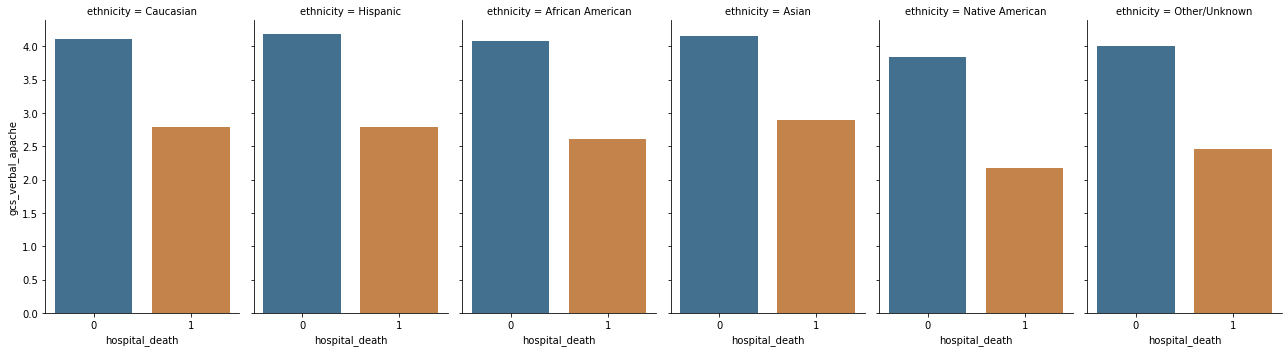

In [17]:
g = sns.catplot(x="hospital_death", y="gcs_verbal_apache", col="ethnicity",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

In [18]:
# all of the plots above our consistent with our understanding of what we have read on gcs lets observe this with a sum of these variables 
df['gcs_score'] = df['gcs_eyes_apache'] + df['gcs_verbal_apache'] + df['gcs_motor_apache']

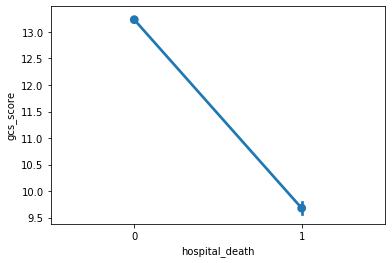

In [19]:
ax = sns.pointplot(x="hospital_death", y="gcs_score", data=df)

In [20]:
df['gcs_score'].isnull().sum() / len(df['gcs_score']) * 100

2.072770490552048

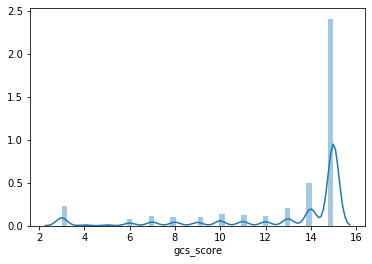

In [21]:
# the majority of our sample sizes distribution is high score which is indicative our imbalanced sample of death and nondeaths
sns.distplot(df['gcs_score'].dropna())

In [22]:
dead_gcs_subset = df[df['hospital_death'] == 1]

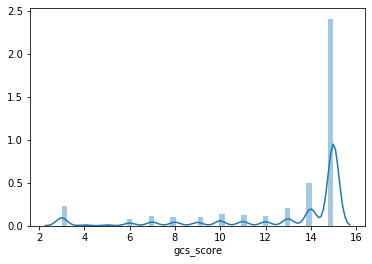

In [23]:
ax = sns.distplot(df['gcs_score'].dropna())

In [24]:
# this is a binomial distribution for those that experience hospital death
# be careful about any averaging on this variable especially for those who experience death because it won't be representative

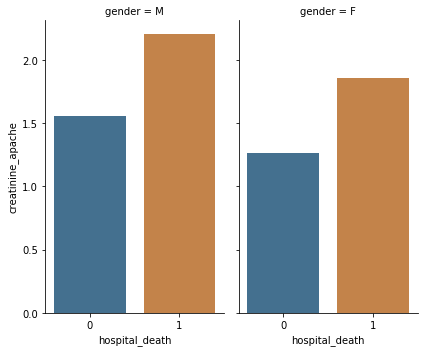

In [25]:
g = sns.catplot(x="hospital_death", y="creatinine_apache", col = 'gender',
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)

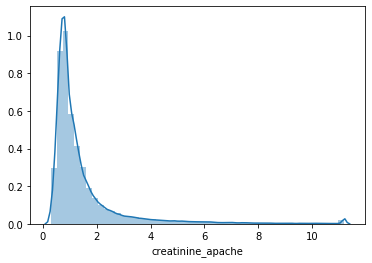

In [26]:
ax = sns.distplot(df['creatinine_apache'].dropna())

In [27]:
# high creatine values result in death, so the distribution we have here is skewed.

In [28]:
df['apache_3j_bodysystem'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

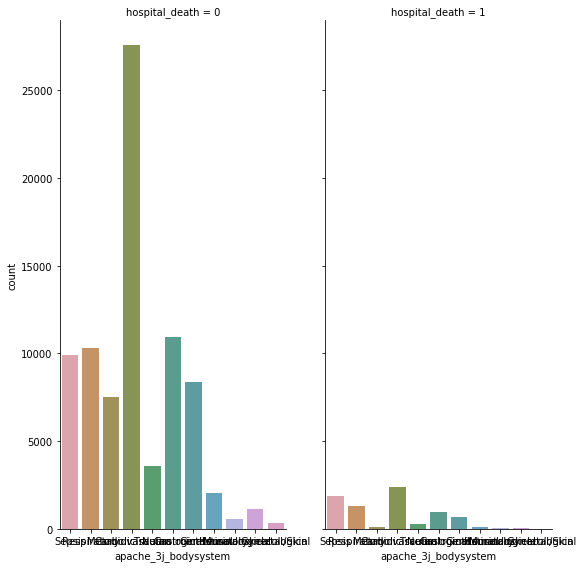

In [29]:
g = sns.catplot(x="apache_3j_bodysystem", col = 'hospital_death',
                data=df, saturation=.5,
                kind="count", ci=None, height = 8 ,aspect=.5)

#### diasbp (diastolic blood pressure) during first 24 hours.

In [30]:
# The synthesized (both invasive and non-invasive) has less missing values. Should keep these ones only. 
# This also happens to other blood pressure predictors. 
df.loc[df['d1_diasbp_max'] != df['d1_diasbp_noninvasive_max']]

# Check if invasive or non_invasive affects target. Patients had invasive method tend to be positive. 
df.loc[df['d1_diasbp_invasive_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.927601
1    0.072399
Name: hospital_death, dtype: float64

In [31]:
df.loc[~df['d1_diasbp_invasive_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.873867
1    0.126133
Name: hospital_death, dtype: float64

In [32]:
# Create column diasbp invasive or not
df['diasbp_isInvasive'] = ~df['d1_diasbp_invasive_max'].isna()*1

In [33]:
# Drop invasive and non-invasive and keep synthesized only.
df.drop(['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min','d1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min'], axis = 1, inplace=True)

/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/meghnadiwan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


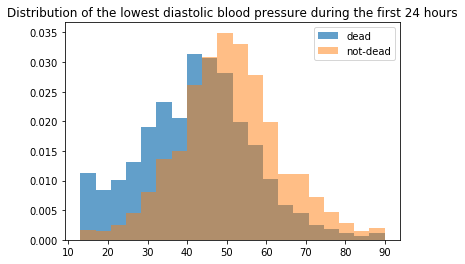

In [34]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_diasbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_diasbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest diastolic blood pressure during the first 24 hours')

plt.show()

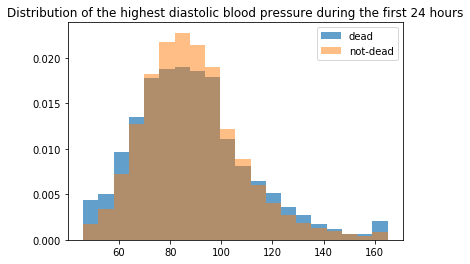

In [35]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_diasbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_diasbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest diastolic blood pressure during the first 24 hours')

plt.show()

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4197073/

Positive patients' lowest diastolic blood presssure is lower. The highest is also more extreme on both ends. 

#### mbp (mean blood pressure)

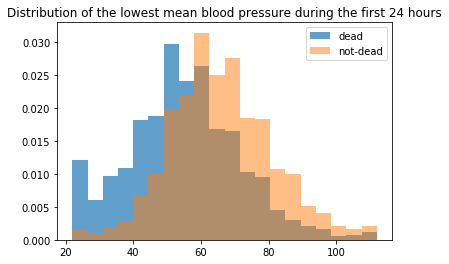

In [36]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_mbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_mbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest mean blood pressure during the first 24 hours')

plt.show()

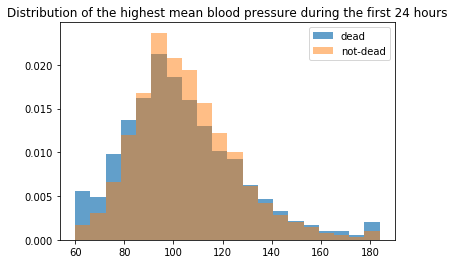

In [37]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_mbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_mbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest mean blood pressure during the first 24 hours')

plt.show()

Positive patients clearly had a more left-skewed lower mean blood pressure distribution. They had a lower highest pressure as well. 

#### sysbp (systolic blood pressure )

In [38]:
df.loc[df['d1_sysbp_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.805031
1    0.194969
Name: hospital_death, dtype: float64

In [39]:
# Create column indicating whether sysbp is missing. 
df['is_sysbp_missing'] = df['d1_sysbp_max'].isna()*1

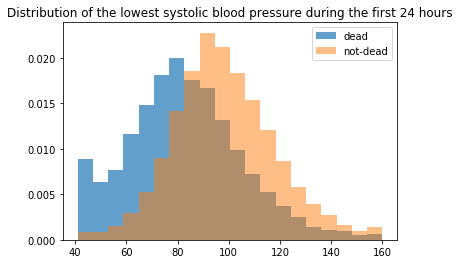

In [40]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_sysbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_sysbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest systolic blood pressure during the first 24 hours')

plt.show()

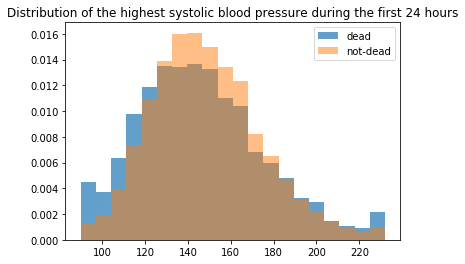

In [41]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_sysbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_sysbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest systolic blood pressure during the first 24 hours')

plt.show()

Same findings as mean blood pressure and diastolic blood pressure. How do we transform these variables? Group them?

#### Diasbp during the first hour

In [42]:
df.loc[df['h1_diasbp_max'].isna(), 'hospital_death'].value_counts(normalize=True)

0    0.922078
1    0.077922
Name: hospital_death, dtype: float64

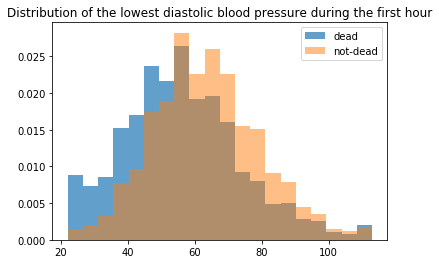

In [43]:
plt.hist(df.loc[df['hospital_death']==1, 'h1_diasbp_min'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'h1_diasbp_min'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the lowest diastolic blood pressure during the first hour')

plt.show()

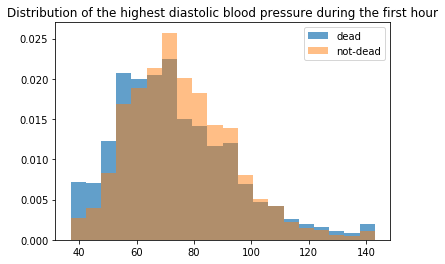

In [44]:
plt.hist(df.loc[df['hospital_death']==1, 'h1_diasbp_max'], alpha=0.7, label = 'dead', bins = 20, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'h1_diasbp_max'], alpha=0.5, label = 'not-dead', bins=20, density = True)
plt.legend(loc='upper right')
plt.title('Distribution of the highest diastolic blood pressure during the first hour')

plt.show()

Same as before

In [45]:
# Track change (h1-d1). 
df['dias_min_change'] = (df['h1_diasbp_min'] - df['d1_diasbp_min'])/df['h1_diasbp_min']
df['dias_max_change'] = (df['h1_diasbp_max'] - df['d1_diasbp_max'])/df['h1_diasbp_max']

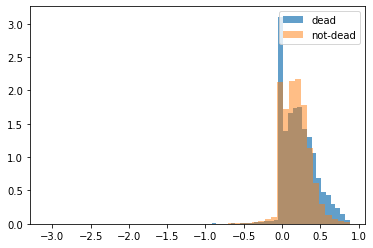

In [46]:
plt.hist(df.loc[df['hospital_death']==1, 'dias_min_change'], alpha=0.7, label = 'dead', bins = 50, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'dias_min_change'], alpha=0.5, label = 'not-dead', bins=50, density = True)
plt.legend(loc='upper right')

plt.show()

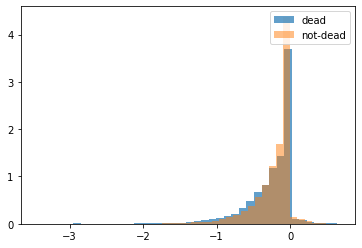

In [47]:
plt.hist(df.loc[df['hospital_death']==1, 'dias_max_change'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'dias_max_change'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

When patients'lowest diastolic blood pressure dropped by 50% or maintained after first hour , they tend to be positive. 

#### d1_heartrate_max (highest Heartrate)

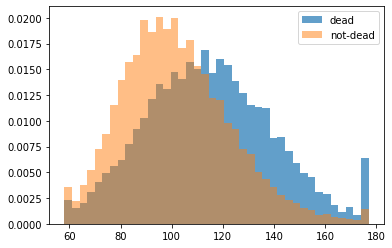

In [48]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_heartrate_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_heartrate_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

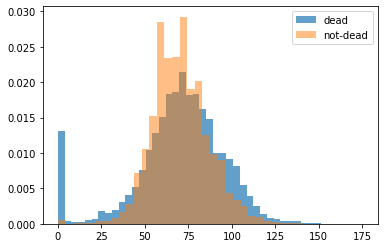

In [49]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_heartrate_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_heartrate_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

Outlier/Extreme values in this case is very important. DO NOT REMOVE. 

#### d1_resprate

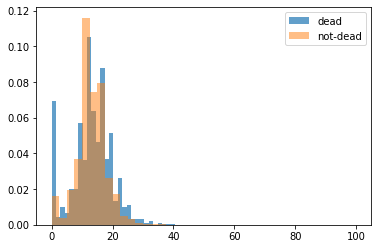

In [50]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_resprate_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_resprate_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

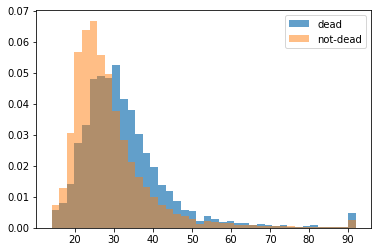

In [51]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_resprate_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_resprate_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

#### d1_spo2_max (Peripheral oxygen saturation)

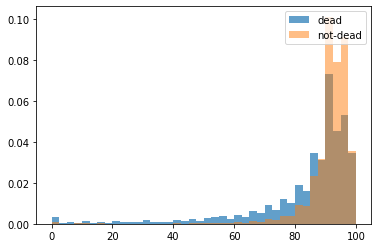

In [52]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_spo2_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_spo2_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

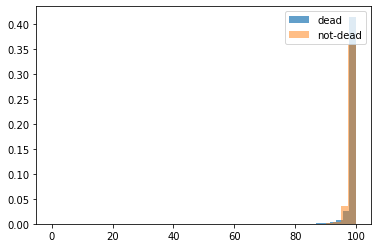

In [53]:
# We can exclude this one. 
plt.hist(df.loc[df['hospital_death']==1, 'd1_spo2_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_spo2_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

#### temperature

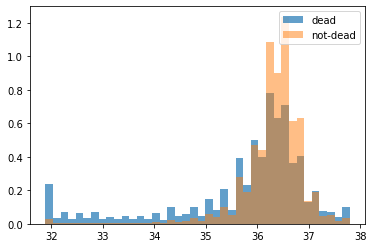

In [54]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_temp_min'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_temp_min'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

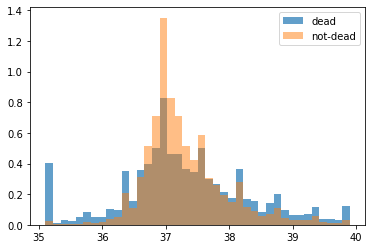

In [55]:
plt.hist(df.loc[df['hospital_death']==1, 'd1_temp_max'], alpha=0.7, label = 'dead', bins = 40, density = True)
plt.hist(df.loc[df['hospital_death']==0, 'd1_temp_max'], alpha=0.5, label = 'not-dead', bins=40, density = True)
plt.legend(loc='upper right')

plt.show()

## h1_heartrate_max, h1_heartrate_min 
## The patient's highest/lowest heart rate during the first hour of their unit stay 

In [56]:
# Only 3% of the data is missing both variables. 
df[["h1_heartrate_max", "h1_heartrate_min"]].isnull(). \
groupby(["h1_heartrate_max", "h1_heartrate_min"]).sum()
# When one is missing, the other is too

,
h1_heartrate_max,h1_heartrate_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a198c0940>,
      dtype=object)

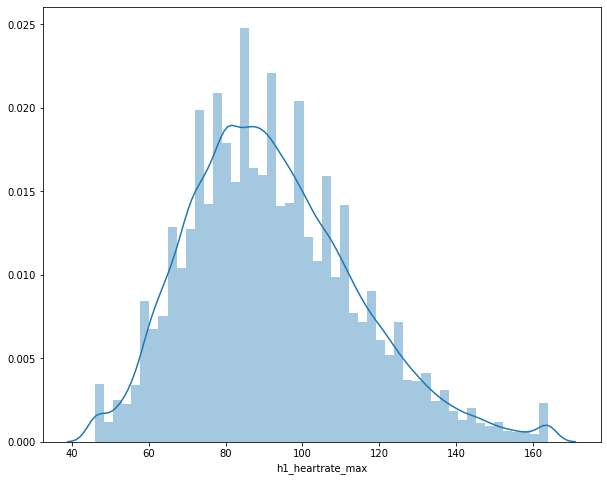

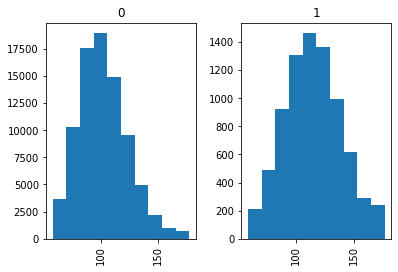

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_heartrate_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_heartrate_max'].dropna())

df['d1_heartrate_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29d86908>,
      dtype=object)

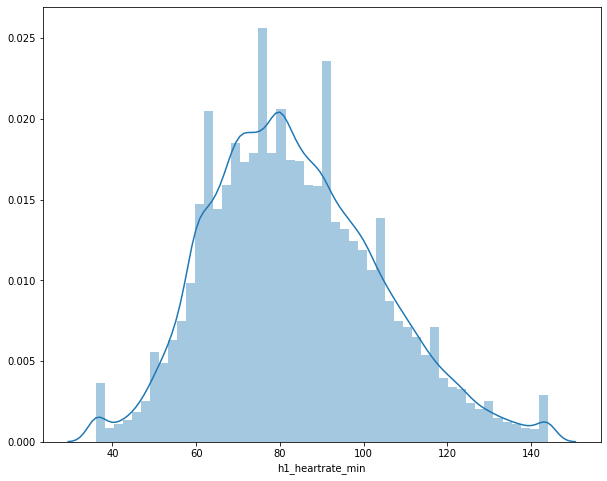

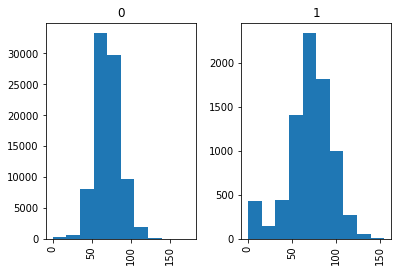

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_heartrate_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_heartrate_min'].dropna())

df['d1_heartrate_min'].hist(bins = 10, by=df['hospital_death'])

In [59]:
df[df.h1_heartrate_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size()\
/ len(df[df.h1_heartrate_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.039785
                Chest Pain Center      0                     0.000358
                Direct Admit           0                     0.067742
                Emergency Department   0                     0.457348
                Floor                  0                     0.091756
                ICU                    0                     0.000717
                Operating Room         0                     0.096057
                Other Hospital         0                     0.010753
                Other ICU              0                     0.002867
                PACU                   0                     0.003226
                Recovery Room          0                     0.022581
                Step-Down Unit (SDU)   0                     0.005018
1               Acute Care/Floor       0                     0.002867
                Direct Admit    

## h1_mbp_invasive_max, h1_mbp_invasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, invasively measured

In [60]:
df[["h1_mbp_invasive_max", "h1_mbp_invasive_min"]].isnull(). \
groupby(["h1_mbp_invasive_max", "h1_mbp_invasive_min"]).sum()

,
h1_mbp_invasive_max,h1_mbp_invasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a6109e8>,
      dtype=object)

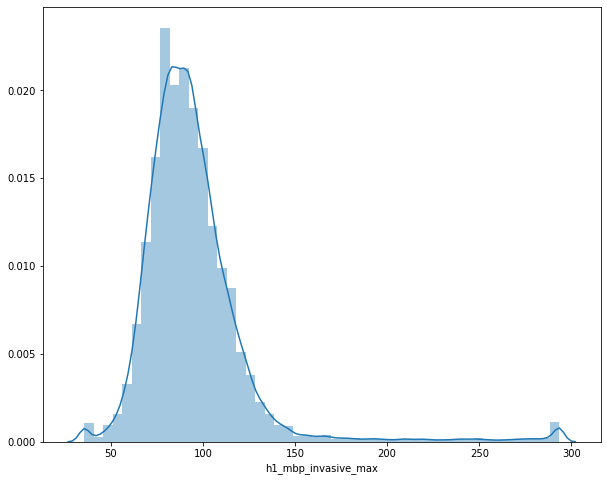

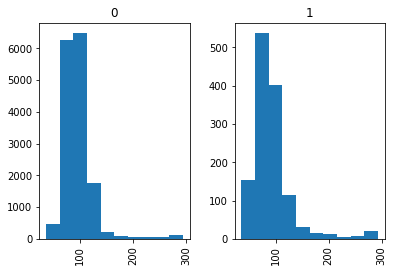

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_invasive_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_invasive_max'].dropna())

df['h1_mbp_invasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a7811d0>,
      dtype=object)

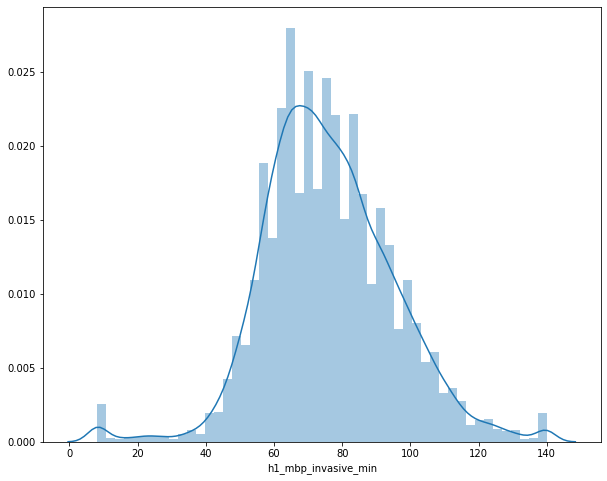

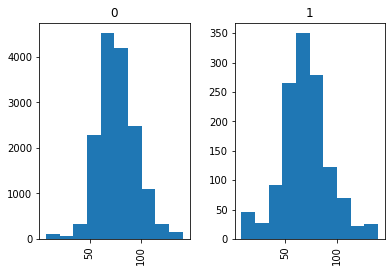

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_invasive_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_invasive_min'].dropna())

df['h1_mbp_invasive_min'].hist(bins = 10, by=df['hospital_death'])

In [63]:
df[df.h1_mbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size()\
/ len(df[df.h1_mbp_invasive_max.isnull()])

hospital_death
0    0.911603
1    0.088397
dtype: float64

## h1_mbp_max, h1_mbp_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [64]:
# 81.6% obs are missing these
df[["h1_mbp_max", "h1_mbp_min"]].isnull(). \
groupby(["h1_mbp_max", "h1_mbp_min"]).sum()

,
h1_mbp_max,h1_mbp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c2129b0>,
      dtype=object)

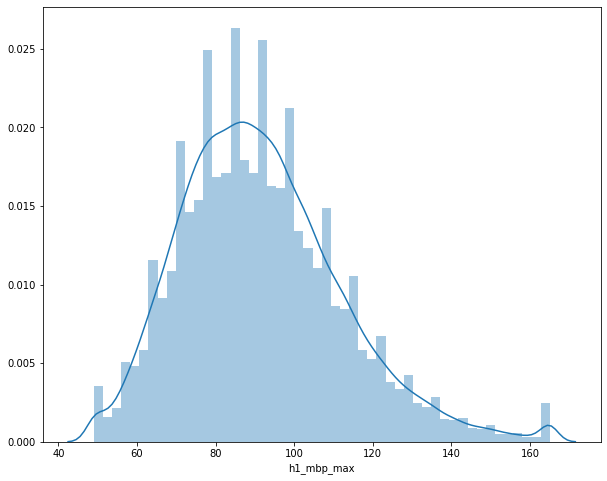

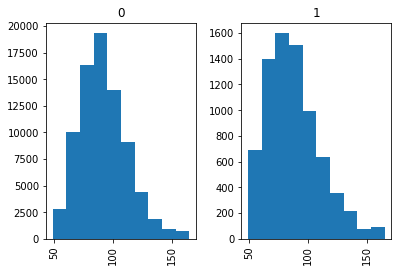

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_max'].dropna())

df['h1_mbp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a298ae9e8>,
      dtype=object)

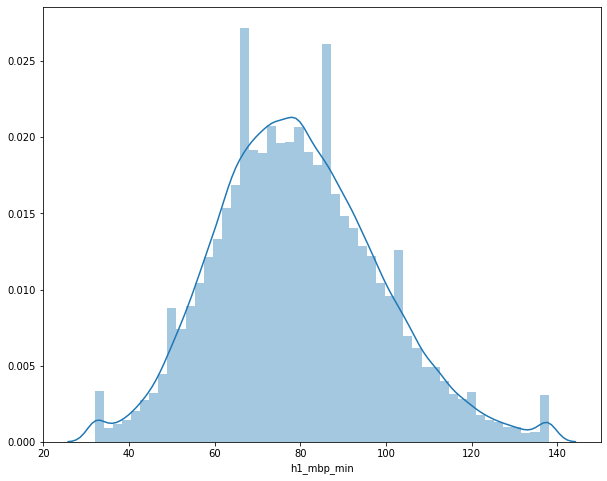

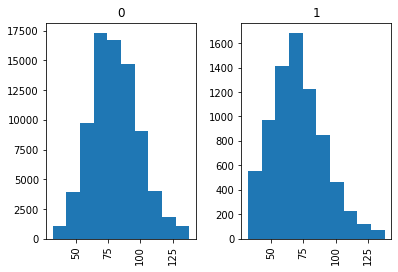

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_min'].dropna())

df['h1_mbp_min'].hist(bins = 10, by=df['hospital_death'])

In [67]:
df[df.h1_mbp_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(df[df.h1_mbp_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.027592
                Chest Pain Center      0                     0.000216
                Direct Admit           0                     0.070920
                Emergency Department   0                     0.446864
                Floor                  0                     0.105626
                ICU                    0                     0.000862
                ICU to SDU             0                     0.000216
                Operating Room         0                     0.081914
                Other                  0                     0.000216
                Other Hospital         0                     0.012287
                Other ICU              0                     0.004096
                PACU                   0                     0.003018
                Recovery Room          0                     0.025437
                Step-Down Unit (

## h1_mbp_noninvasive_max, h1_mbp_noninvasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, non-invasively measured

In [68]:
df[["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]].isnull(). \
groupby(["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]).sum()

,
h1_mbp_noninvasive_max,h1_mbp_noninvasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29801470>,
      dtype=object)

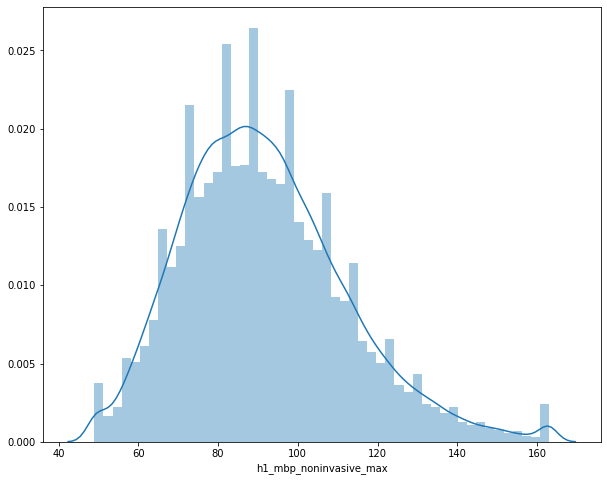

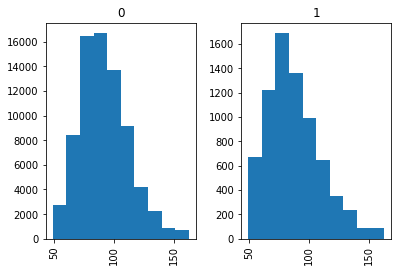

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_noninvasive_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_noninvasive_max'].dropna())

df['h1_mbp_noninvasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ec49e8>,
      dtype=object)

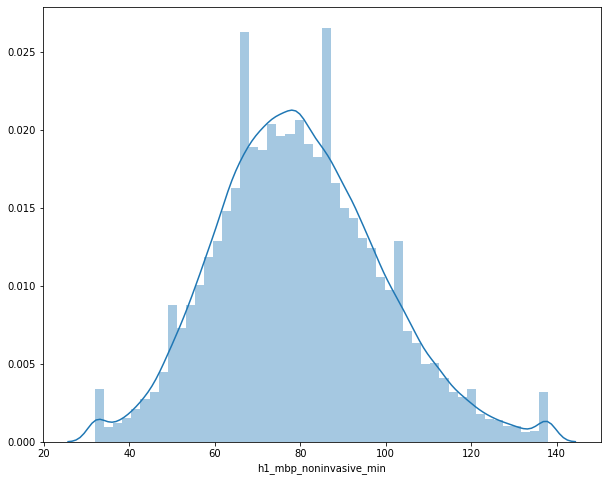

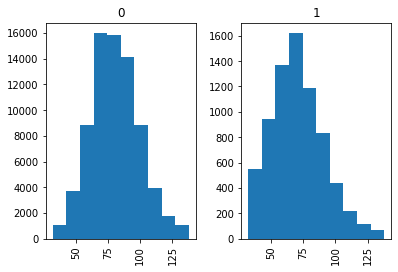

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_mbp_noninvasive_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_mbp_noninvasive_min'].dropna())

df['h1_mbp_noninvasive_min'].hist(bins = 10, by=df['hospital_death'])

In [71]:
df[df.h1_mbp_noninvasive_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(df[df.h1_mbp_noninvasive_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.016513
                Chest Pain Center      0                     0.000330
                Direct Admit           0                     0.052400
                Emergency Department   0                     0.258036
                Floor                  0                     0.066491
                ICU                    0                     0.000661
                ICU to SDU             0                     0.001101
                Operating Room         0                     0.334654
                Other                  0                     0.000110
                Other Hospital         0                     0.011118
                Other ICU              0                     0.003523
                PACU                   0                     0.007596
                Recovery Room          0                     0.043593
                Step-Down Unit (

## h1_resprate_max, h1_resprate_min
## The patient's highest/lowest respiratory rate during the first hour of their unit stay

In [72]:
df[["h1_resprate_max", "h1_resprate_min"]].isnull(). \
groupby(["h1_resprate_max", "h1_resprate_min"]).sum()

,
h1_resprate_max,h1_resprate_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1780f470>,
      dtype=object)

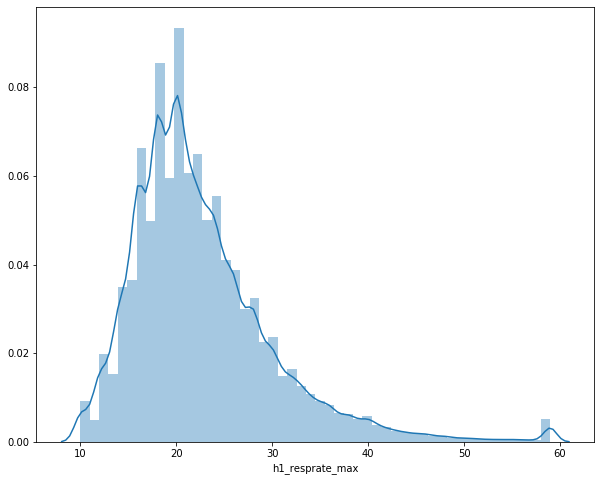

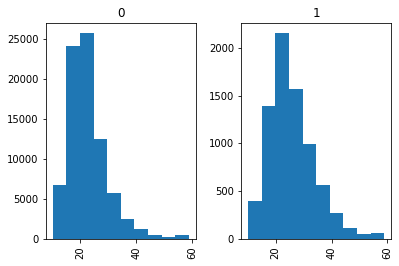

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_resprate_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_resprate_max'].dropna())

df['h1_resprate_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29bc5470>,
      dtype=object)

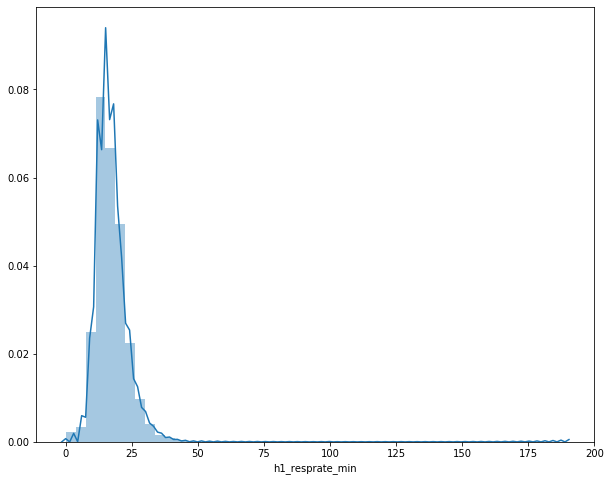

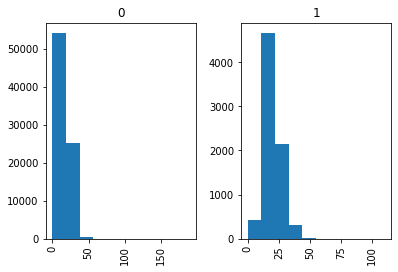

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_resprate_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_resprate_min'].dropna())

df['h1_resprate_min'].hist(bins = 10, by=df['hospital_death'])

In [75]:
df[df.h1_resprate_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_resprate_max.isnull()])

hospital_death
0    0.922194
1    0.077806
dtype: float64

## h1_spo2_max, h1_spo2_min
## The patient's highest/lowest peripheral oxygen saturation during the first hour of their unit stay

In [76]:
df[["h1_spo2_max", "h1_spo2_min"]].isnull(). \
groupby(["h1_spo2_max", "h1_spo2_min"]).sum()

,
h1_spo2_max,h1_spo2_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19425a90>,
      dtype=object)

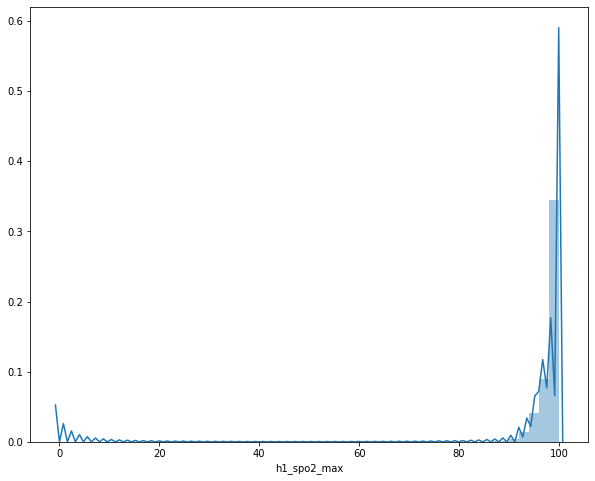

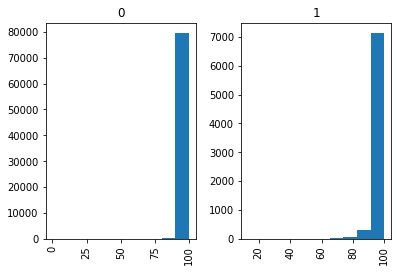

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_spo2_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_spo2_max'].dropna())

df['h1_spo2_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a6a99b0>,
      dtype=object)

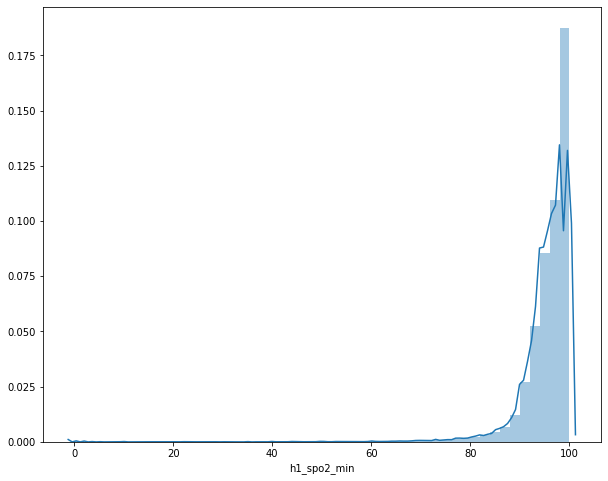

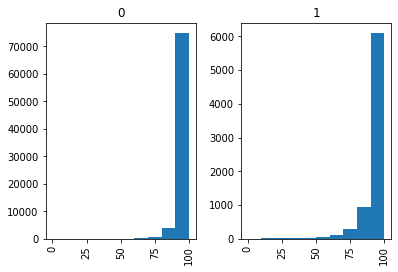

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_spo2_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_spo2_min'].dropna())

df['h1_spo2_min'].hist(bins = 10, by=df['hospital_death'])

In [79]:
df[df.h1_spo2_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_spo2_max.isnull()])

hospital_death
0    0.910872
1    0.089128
dtype: float64

## h1_sysbp_invasive_max, h1_sysbp_invasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, invasively measured

In [80]:
df[["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]].isnull(). \
groupby(["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]).sum()

,
h1_sysbp_invasive_max,h1_sysbp_invasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bba9a90>,
      dtype=object)

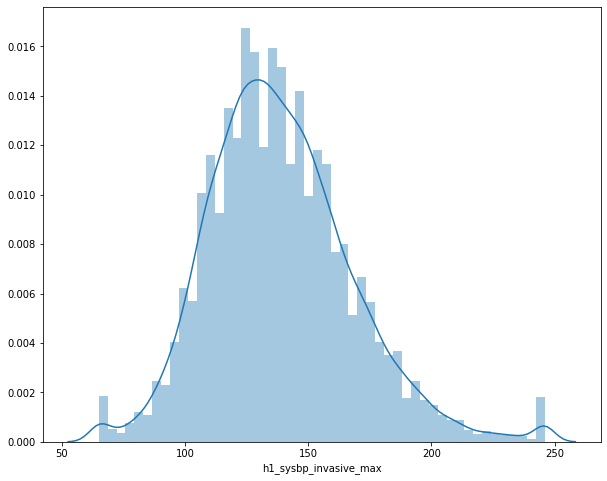

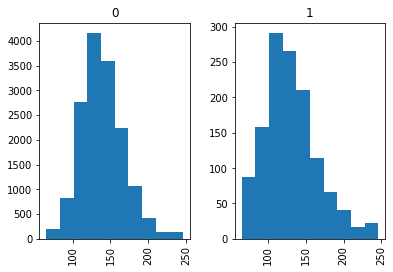

In [81]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_invasive_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_invasive_max'].dropna())

df['h1_sysbp_invasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c488cf8>,
      dtype=object)

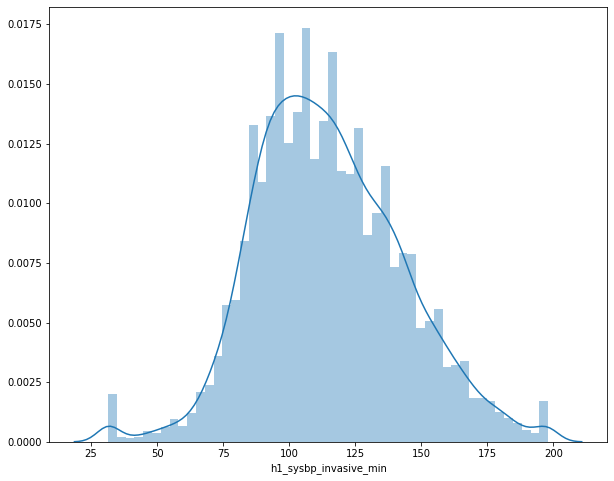

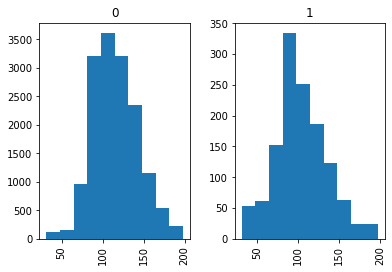

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_invasive_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_invasive_min'].dropna())

df['h1_sysbp_invasive_min'].hist(bins = 10, by=df['hospital_death'])

In [83]:
df[df.h1_sysbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_sysbp_invasive_max.isnull()])

hospital_death
0    0.911366
1    0.088634
dtype: float64

## h1_sysbp_max, h1_sysbp_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [84]:
df[["h1_sysbp_max", "h1_sysbp_min"]].isnull(). \
groupby(["h1_sysbp_max", "h1_sysbp_min"]).sum()

,
h1_sysbp_max,h1_sysbp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cd38748>,
      dtype=object)

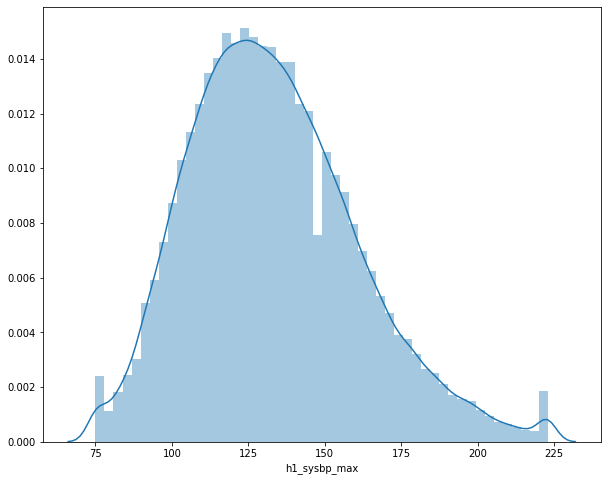

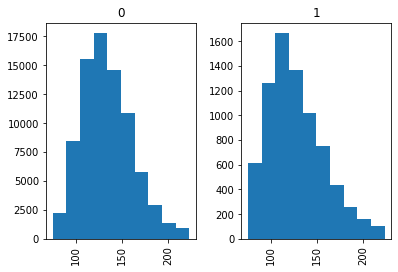

In [85]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_max'].dropna())

df['h1_sysbp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2de07c88>,
      dtype=object)

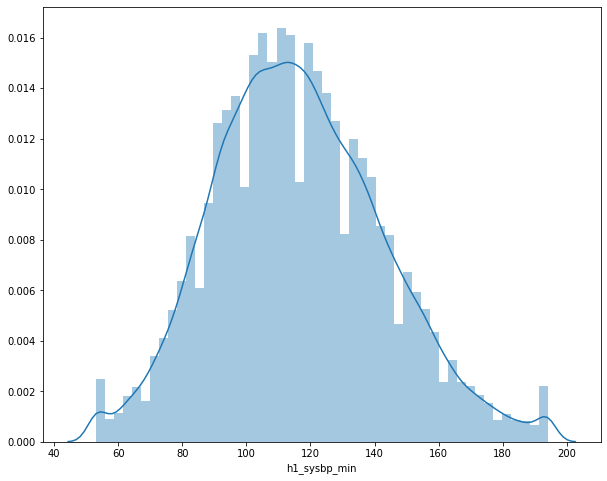

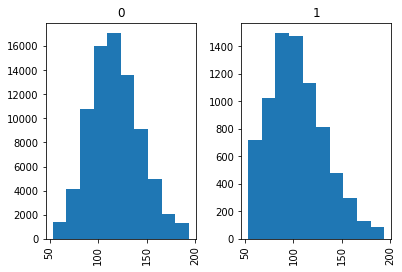

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_min'].dropna())

df['h1_sysbp_min'].hist(bins = 10, by=df['hospital_death'])

In [87]:
df[df.h1_sysbp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_sysbp_max.isnull()])

hospital_death
0    0.922182
1    0.077818
dtype: float64

## h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured

In [88]:
df[["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]].isnull(). \
groupby(["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]).sum()

,
h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2df17400>,
      dtype=object)

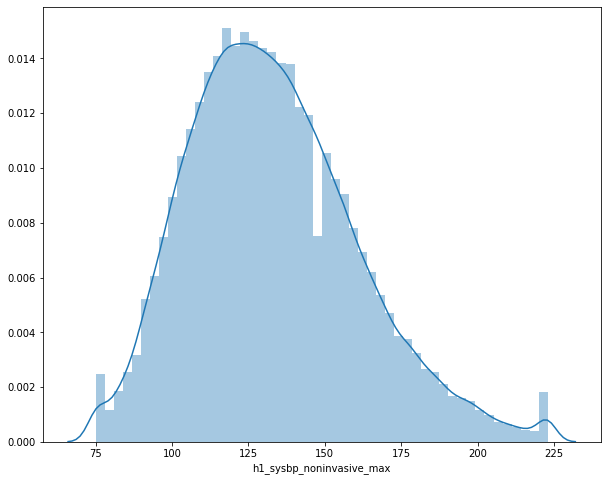

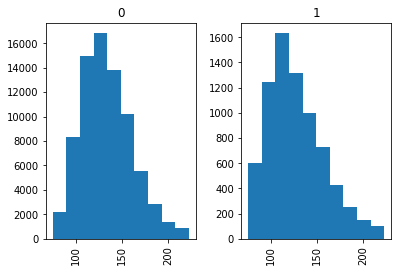

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_noninvasive_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_noninvasive_max'].dropna())

df['h1_sysbp_noninvasive_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2dbb8be0>,
      dtype=object)

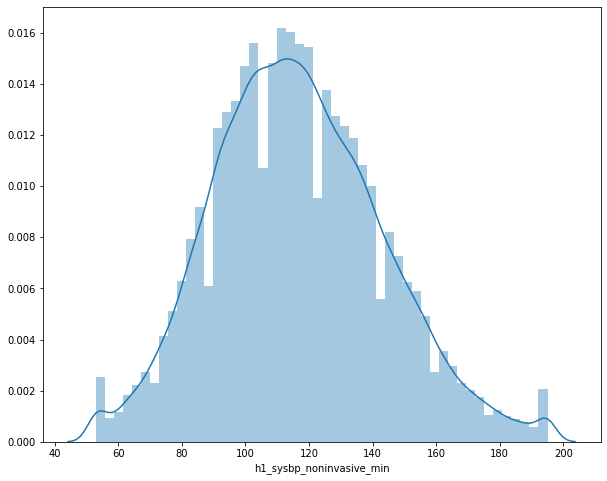

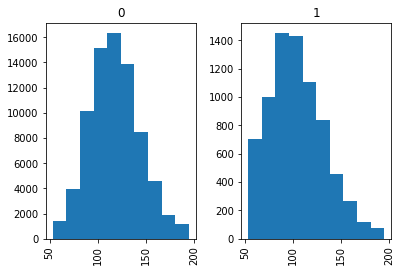

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_sysbp_noninvasive_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_sysbp_noninvasive_min'].dropna())

df['h1_sysbp_noninvasive_min'].hist(bins = 10, by=df['hospital_death'])

In [91]:
df[df.h1_sysbp_noninvasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_sysbp_noninvasive_max.isnull()])

hospital_death
0    0.935976
1    0.064024
dtype: float64

## h1_temp_max, h1_temp_min
## The patient's highest/lowest core temperature during the first hour of their unit stay, invasively measured

In [92]:
df[["h1_temp_max", "h1_temp_min"]].isnull(). \
groupby(["h1_temp_max", "h1_temp_min"]).sum()

,
h1_temp_max,h1_temp_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e5025f8>,
      dtype=object)

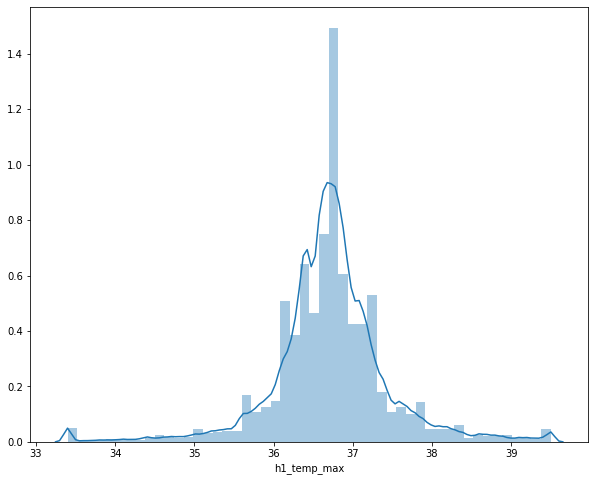

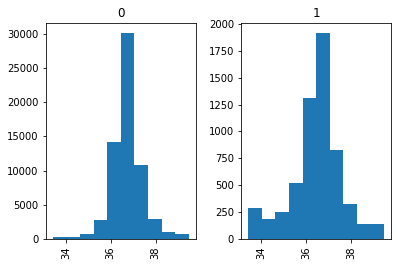

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_temp_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_temp_max'].dropna())

df['h1_temp_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e7f3400>,
      dtype=object)

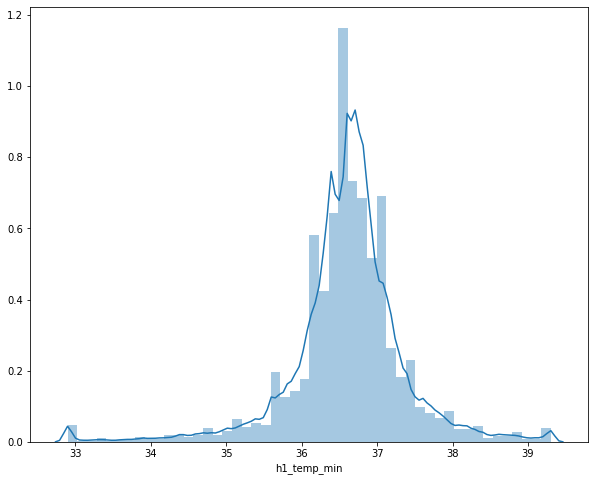

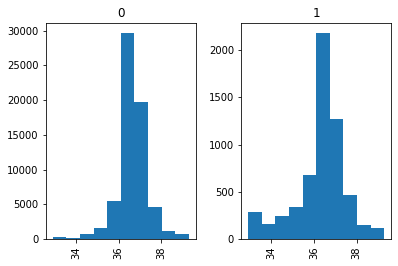

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_temp_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_temp_min'].dropna())

df['h1_temp_min'].hist(bins = 10, by=df['hospital_death'])

In [95]:
df[df.h1_temp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(df[df.h1_temp_max.isnull()])

hospital_death
0    0.907234
1    0.092766
dtype: float64

## h1_bilirubin_max, h1_bilirubin_min
## The highest/lowest bilirubin concentration of the patient in their serum or plasma during the first hour of their unit stay

In [96]:
df[["h1_bilirubin_max", "h1_bilirubin_min"]].isnull(). \
groupby(["h1_bilirubin_max", "h1_bilirubin_min"]).sum()

,
h1_bilirubin_max,h1_bilirubin_min
False,False
True,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2df4f320>,
      dtype=object)

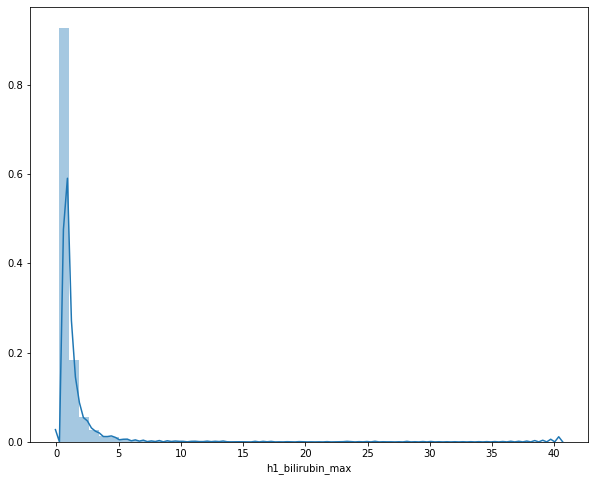

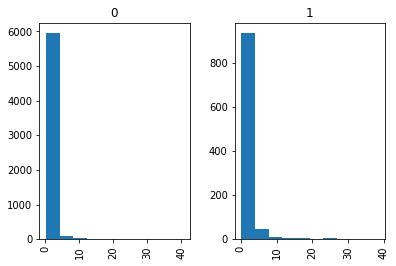

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_bilirubin_max", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_bilirubin_max'].dropna())

df['h1_bilirubin_max'].hist(bins = 10, by=df['hospital_death'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f296c50>,
      dtype=object)

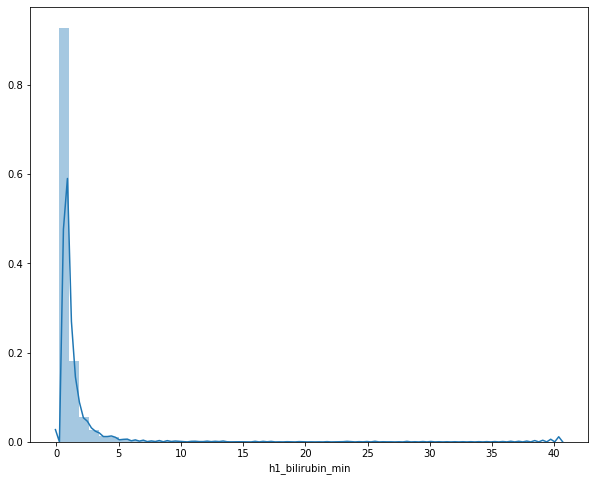

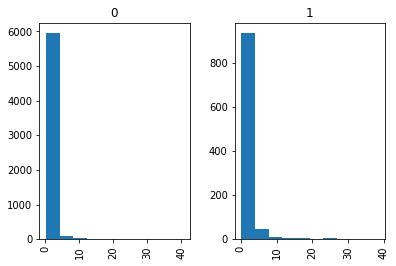

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(x="h1_bilirubin_min", y="hospital_death", orient = "h", data=df)
sns.distplot(df['h1_bilirubin_min'].dropna())

df['h1_bilirubin_min'].hist(bins = 10, by=df['hospital_death'])

In [99]:
df[df.h1_bilirubin_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
#/ len(df[df.h1_bilirubin_max.isnull()])

hospital_death
0    77719
1     6900
dtype: int64

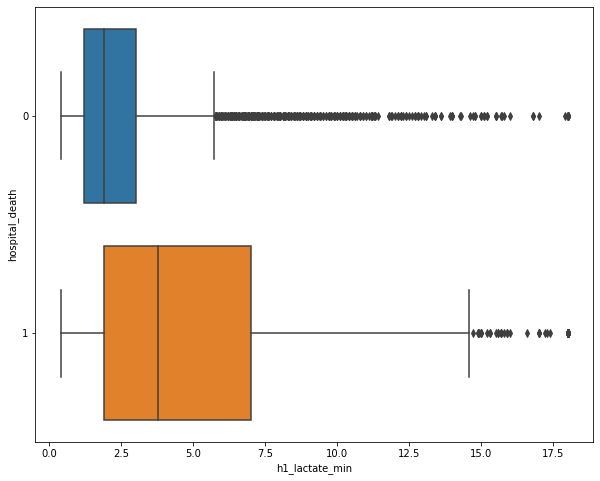

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_lactate_min", y="hospital_death", orient = "h", data=df)

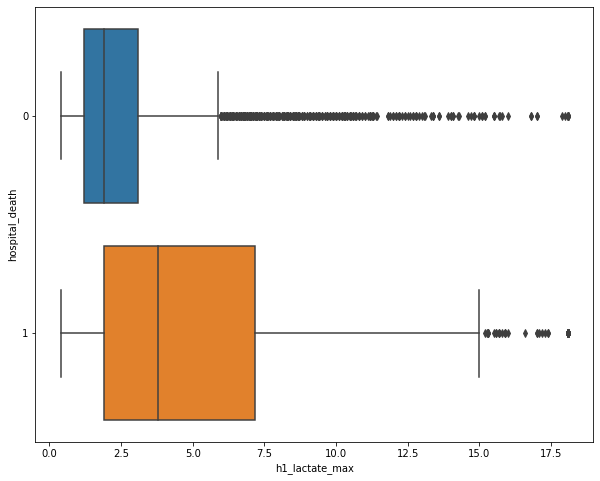

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_lactate_max", y="hospital_death", orient = "h", data=df)

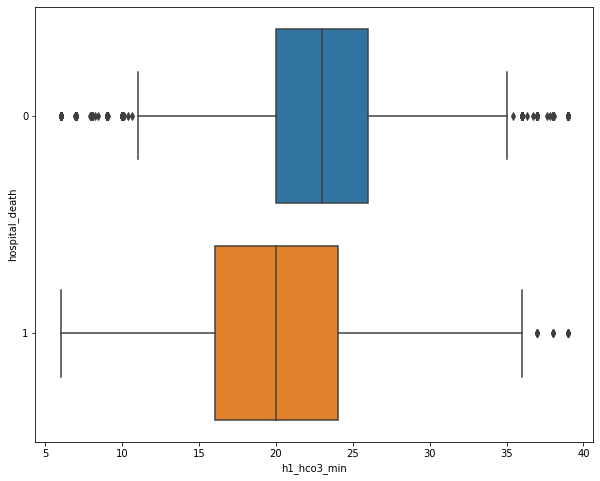

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_hco3_min", y="hospital_death", orient = "h", data=df)

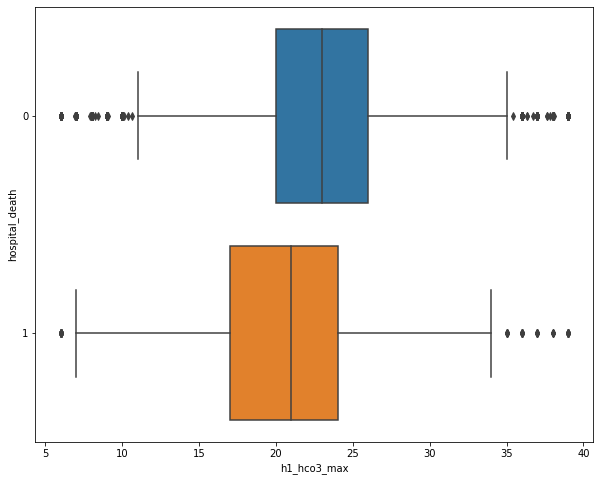

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_hco3_max", y="hospital_death", orient = "h", data=df)

In [104]:
df['h1_lactate'] = df[['h1_lactate_min', 'h1_lactate_max']].mean(axis=1)

In [105]:
df['h1_lactate'].head()

0    NaN
1    3.5
2    NaN
3    NaN
4    NaN
Name: h1_lactate, dtype: float64

In [106]:
df = df.drop(columns=['h1_lactate_max','h1_lactate_min'])

In [107]:
df.shape

(91713, 186)

In [108]:
df['h1_creatinine'] = df[['h1_creatinine_min', 'h1_creatinine_max']].mean(axis=1)
df.shape

(91713, 187)

In [109]:
df['h1_glucose'] = df[['h1_glucose_min', 'h1_glucose_max']].mean(axis=1)
df.shape

(91713, 188)

In [110]:
df['h1_glucose'].describe()

count    39099.00000
mean       163.60393
std         91.10047
min         50.50000
25%        109.00000
50%        137.00000
75%        184.00000
max        682.52250
Name: h1_glucose, dtype: float64

In [111]:
df['h1_glucose_min'].describe()

count    39099.000000
mean       159.222742
std         89.157455
min         42.000000
25%        106.000000
50%        134.000000
75%        179.000000
max        670.000000
Name: h1_glucose_min, dtype: float64

In [112]:
df['h1_glucose_max'].describe()

count    39099.000000
mean       167.985117
std         94.721856
min         59.000000
25%        111.000000
50%        140.000000
75%        189.000000
max        695.045000
Name: h1_glucose_max, dtype: float64

In [113]:
df['h1_hco3'] = df[['h1_hco3_min', 'h1_hco3_max']].mean(axis=1)
df.shape

(91713, 189)

In [114]:
df['h1_hemaglobin'] = df[['h1_hemaglobin_min', 'h1_hemaglobin_max']].mean(axis=1)
df.shape

(91713, 190)

In [115]:
df['h1_hematocrit'] = df[['h1_hematocrit_min', 'h1_hematocrit_max']].mean(axis=1)
df.shape

(91713, 191)

In [116]:
df['h1_inr'] = df[['h1_inr_min', 'h1_inr_max']].mean(axis=1)
df.shape

(91713, 192)

In [117]:
df['h1_platelets'] = df[['h1_platelets_max', 'h1_platelets_min']].mean(axis=1)
df.shape

(91713, 193)

In [118]:
df['h1_potassium'] = df[['h1_potassium_min', 'h1_potassium_max']].mean(axis=1)
df.shape

(91713, 194)

In [119]:
df['h1_sodium'] = df[['h1_sodium_min', 'h1_sodium_max']].mean(axis=1)
df.shape

(91713, 195)

In [120]:
df['h1_wbc'] = df[['h1_wbc_min', 'h1_wbc_max']].mean(axis=1)
df.shape

(91713, 196)

# d1_albumin_max & d1_albumin_min

In [6]:
x = df.h1_albumin_max.dropna()
y = df.h1_albumin_min.dropna()
sum(x!=y)

37

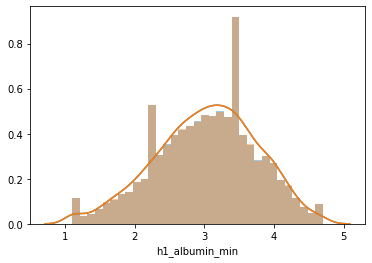

In [7]:
sns.distplot(x)
sns.distplot(y)

# Distribution

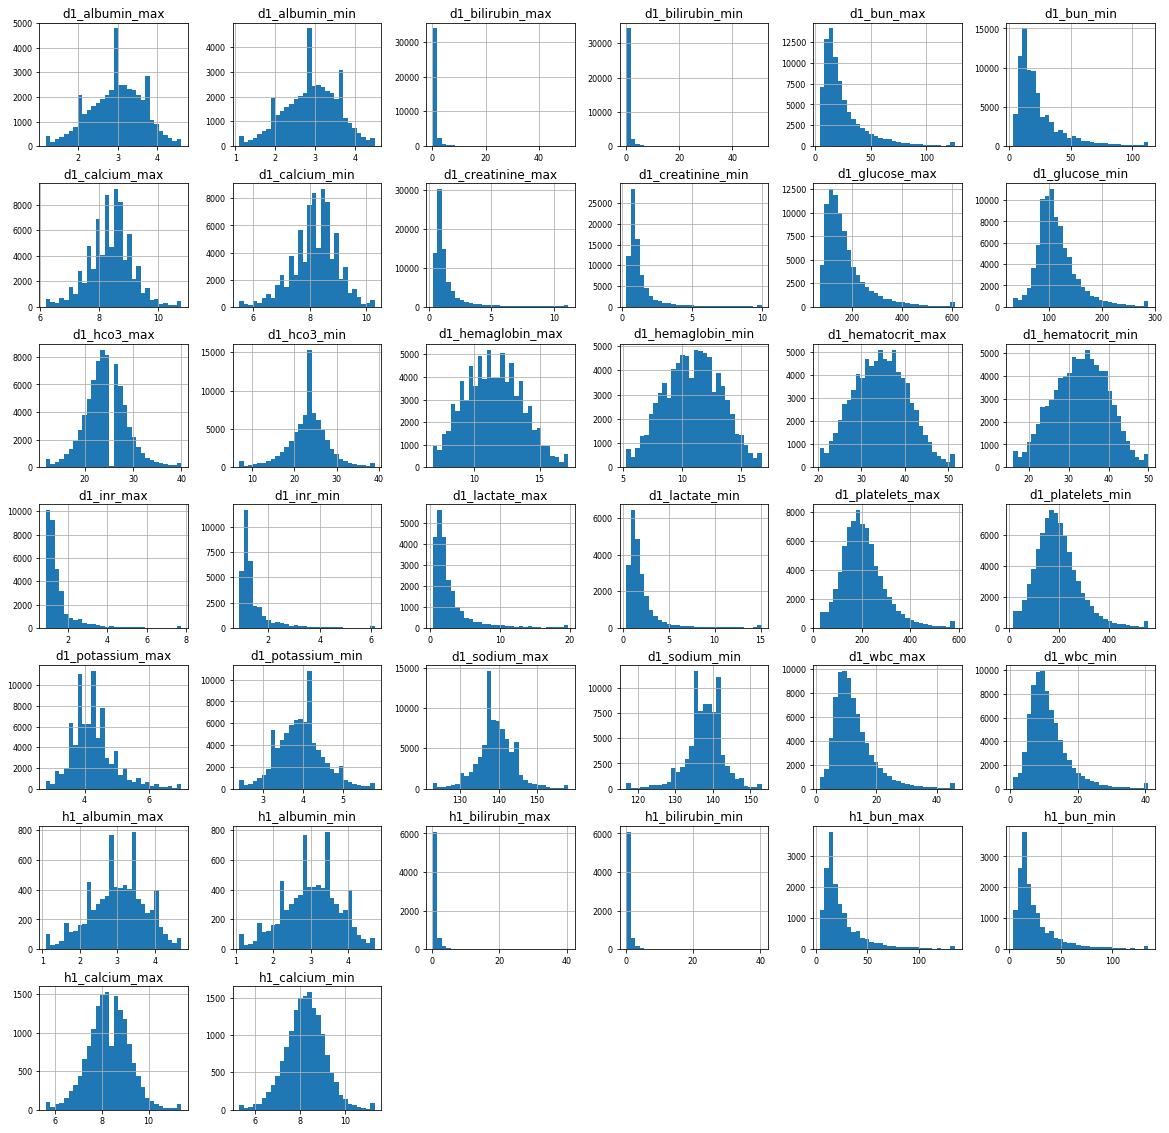

In [16]:
labs_subset = df[name]

labs_subset.hist(figsize = (20,20),bins=30,xlabelsize=8,ylabelsize=8)
plt.show()

# Relationship between Missing Data & Death 

In [8]:
for i in name:
    if df[i].isna()[df.hospital_death == 1].sum()/7915>0.6:
        print(i , df[i].isna()[df.hospital_death == 1].sum()/7915)

h1_albumin_max 0.8578648136449779
h1_albumin_min 0.8578648136449779
h1_bilirubin_max 0.8717624763108023
h1_bilirubin_min 0.8717624763108023
h1_bun_max 0.7713202779532533
h1_bun_min 0.7713202779532533
h1_calcium_max 0.7840808591282376
h1_calcium_min 0.7840808591282376


# Add new columns

In [9]:
df['if_h1_albumin_max_missed'] = df['h1_albumin_max'].isna()

In [10]:
df['if_h1_bilirubin_max_missed'] = df['h1_bilirubin_max'].isna()

In [11]:
df['if_h1_bun_max_missed'] = df['h1_bun_max'].isna()

In [12]:
df['if_h1_calcium_max_missed'] = df['h1_calcium_max'].isna()

# Highly correlated features

In [13]:
X1 = df.drop('hospital_death',axis = 1)

In [14]:
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X1.corr().abs()
corr_matrix

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,if_h1_albumin_max_missed,if_h1_bilirubin_max_missed,if_h1_bun_max_missed,if_h1_calcium_max_missed
encounter_id,1.000000,0.009575,0.004532,0.003990,0.001068,0.002036,0.005400,0.000992,0.000570,NaN,...,0.003402,0.000972,0.001707,0.002172,0.001176,0.004646,0.003311,0.003215,0.002706,0.001554
patient_id,0.009575,1.000000,0.007075,0.006343,0.001380,0.001387,0.002902,0.001770,0.004412,NaN,...,0.000434,0.001667,0.000548,0.000844,0.002333,0.003065,0.002764,0.002782,0.001986,0.001557
hospital_id,0.004532,0.007075,1.000000,0.008673,0.012874,0.052123,0.027895,0.004526,0.001285,NaN,...,0.011978,0.001362,0.000146,0.002992,0.002588,0.004730,0.035445,0.038527,0.048069,0.052032
age,0.003990,0.006343,0.008673,1.000000,0.087077,0.067320,0.109937,0.024257,0.049872,NaN,...,0.077908,0.020061,0.025007,0.030310,0.023335,0.025924,0.019911,0.021382,0.010028,0.007807
bmi,0.001068,0.001380,0.012874,0.087077,1.000000,0.015921,0.056316,0.001403,0.001531,NaN,...,0.172943,0.001855,0.031144,0.013375,0.010017,0.043380,0.007635,0.007720,0.006450,0.004777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solid_tumor_with_metastasis,0.004646,0.003065,0.004730,0.025924,0.043380,0.015369,0.004921,0.014381,0.036581,NaN,...,0.013122,0.007240,0.269653,0.006210,0.014749,1.000000,0.005289,0.006494,0.006565,0.004692
if_h1_albumin_max_missed,0.003311,0.002764,0.035445,0.019911,0.007635,0.006978,0.008634,0.032616,0.020520,NaN,...,0.009610,0.016659,0.004873,0.005892,0.004515,0.005289,1.000000,0.937988,0.625498,0.616548
if_h1_bilirubin_max_missed,0.003215,0.002782,0.038527,0.021382,0.007720,0.009108,0.011597,0.027030,0.014480,NaN,...,0.005702,0.019746,0.006818,0.005481,0.004574,0.006494,0.937988,1.000000,0.588603,0.580338
if_h1_bun_max_missed,0.002706,0.001986,0.048069,0.010028,0.006450,0.146904,0.021328,0.027096,0.050283,NaN,...,0.042946,0.002152,0.005715,0.001587,0.002764,0.006565,0.625498,0.588603,1.000000,0.965981


In [15]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [16]:
drop = []
for i in to_drop:
    if i in name.tolist():
        drop.append(i)

In [17]:
drop.append('d1_lactate_max')
drop.append('d1_lactate_min')

In [18]:
drop

['d1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_min',
 'd1_lactate_max',
 'd1_lactate_min']

In [19]:
drop.append('h1_albumin_max')
drop.append('h1_calcium_max')

In [20]:
drop = list(set(drop))

In [21]:
keep=[]
for i in name:
    if i not in drop:
        keep.append(i)

In [22]:
keep

['d1_calcium_max',
 'd1_calcium_min',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_inr_max',
 'd1_inr_min',
 'd1_platelets_max',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max']

## apache_4a_hospital_death_prob
## The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.

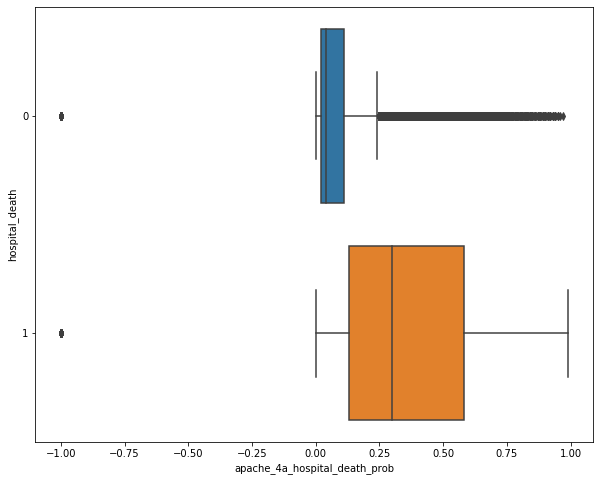

In [171]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_hospital_death_prob", y="hospital_death", orient = "h", data=df)

In [190]:
df[["apache_4a_hospital_death_prob","hospital_death"]].\
groupby(["apache_4a_hospital_death_prob"], as_index = False).mean()

,apache_4a_hospital_death_prob,hospital_death
0,-1.00,0.094053
1,0.00,0.001608
2,0.01,0.003175
3,0.02,0.009228
4,0.03,0.016125
5,0.04,0.022181
6,0.05,0.035531
7,0.06,0.039231
8,0.07,0.046947
9,0.08,0.054898


## apache_4a_icu_death_prob
## The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis

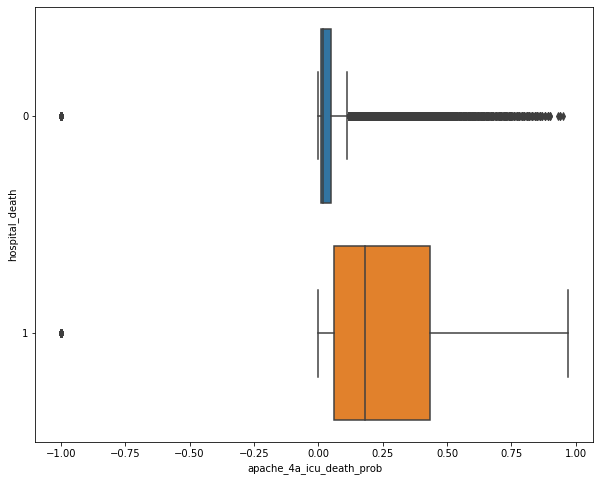

In [188]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_icu_death_prob", y="hospital_death", orient = "h", data=df)

In [209]:
df[["apache_4a_icu_death_prob","hospital_death"]].\
groupby(["apache_4a_icu_death_prob"], as_index = False).mean()

,apache_4a_icu_death_prob,hospital_death
0,-1.00,0.091031
1,0.00,0.001960
2,0.01,0.011998
3,0.02,0.030427
4,0.03,0.040949
5,0.04,0.058406
6,0.05,0.073913
7,0.06,0.098260
8,0.07,0.092851
9,0.08,0.130114


In [219]:
df[["apache_4a_icu_death_prob","icu_stay_type"]].groupby(["icu_stay_type"], as_index = False).median()

,icu_stay_type,apache_4a_icu_death_prob
0,admit,0.02
1,readmit,0.02
2,transfer,0.03


##  Whether patient was diagnosed or had a history of any of the following - 
## aids, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma or solid_tumor_with_metastasis

In [187]:
lst = ["aids","cirrhosis", "diabetes_mellitus", "hepatic_failure",
       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
    

for x in lst:
    print(pd.crosstab(df[x], df['hospital_death']), "\n")
    print(pd.crosstab(df[x], df['icu_stay_type']), "\n")

hospital_death      0     1
aids                       
0.0             83100  7820
1.0                68    10 

icu_stay_type  admit  readmit  transfer
aids                                   
0.0            85663      554      4703
1.0               75        2         1 

hospital_death      0     1
cirrhosis                  
0.0             81988  7582
1.0              1180   248 

icu_stay_type  admit  readmit  transfer
cirrhosis                              
0.0            84374      548      4648
1.0             1364        8        56 

hospital_death         0     1
diabetes_mellitus             
0.0                64271  6235
1.0                18897  1595 

icu_stay_type      admit  readmit  transfer
diabetes_mellitus                          
0.0                66379      402      3725
1.0                19359      154       979 

hospital_death       0     1
hepatic_failure             
0.0              82200  7616
1.0                968   214 

icu_stay_type    admit  re

## apache_3j_bodysystem
## Admission diagnosis group for APACHE III

In [203]:
#1.8% missing obs
df[["apache_3j_bodysystem","hospital_death"]].\
groupby(["apache_3j_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_3j_bodysystem,hospital_death
9,Sepsis,0.157922
8,Respiratory,0.112068
4,Hematological,0.090909
0,Cardiovascular,0.079669
7,Neurological,0.079018
1,Gastrointestinal,0.074230
10,Trauma,0.067413
2,Genitourinary,0.061694
6,Musculoskeletal/Skin,0.047170
5,Metabolic,0.015163


## apache_2_bodysystem
## Admission diagnosis group for APACHE II

In [208]:
#1.8% missing obs
df[["apache_2_bodysystem","hospital_death"]].\
groupby(["apache_2_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_2_bodysystem,hospital_death
6,Respiratory,0.112068
0,Cardiovascular,0.108383
2,Haematologic,0.090909
4,Neurologic,0.079018
1,Gastrointestinal,0.074230
7,Trauma,0.067413
5,Renal/Genitourinary,0.055285
8,Undefined Diagnoses,0.052023
9,Undefined diagnoses,0.019639
3,Metabolic,0.015163
